
#**What is a perceptron?**

The perceptron is one of the earliest simple feed forward neural networks used for binary classification of data. Specifically, a one neuron system is a single perceptron. One layer of these is called a single layer perceptron. It is an example of supervised learning. Despite its simplicity, it yields a powerful model for accurate classification.

**The network and learning algorithm:**

The perceptron network begins with input neurons which is a vector of the input features. Each feature is assigned a weight as it feeds into a neuron called a threshold logic unit. In addition, there is a biasing input vector which just has the number 1 as its elements, along with a corresponding weight.These are fed as a linear combination or a vector product of the input vectors and weight vectors into a single layer of neurons. This linear combination mathematically represents a linear decision boundary in the multi-dimensional space where every input feature forms one axis. The aim is to find the linear decision boundary by finding the optimal weights and bias such that it separates the instances of the two classes. 

The neurons then run a non-linear activation function (mathematical operation) on the weighted sums to yield values typically between 0 and 1 or between -1 and 1. Common functions to achieve these intervals are the binary sigmoidal function and the bipolar sigmoidal function respectively. The output of this function is our predicted output. The desired outputs are 0,1 or -1,1 depending on the problem which is basically deciding whether an input instance belongs to class 0 (or class -1) or class 1. The way the model learns is by being penalized for the errors it makes in prediction as it runs or is trained for every instance.

The error in prediction is computed in terms of the cost function. The aim is to minimize the cost function. We run an iterative code through the instances of the input to run the partial differentiation of the cost function with respect to the weights. We update these weights incrementally in the direction opposite to the gradient descent, measure the cost function again and repeat the process. The algorithm could be that of an online or offline learning model. The whole sequence is run either for large enough iterations to expect a low error, or till a certain desired minimum value of cost function, as set by us, is reached. Finally, for each instance, the output will be one of two classes. This is how single-layer perceptrons work.

**Pros and Cons:**

Perceptrons are fairly simple models to understand and implement, and are good for linearly separable data (e.g. classifying flowers as Setosa or Versicolor using the iris dataset). This very point is a limitation in the broader context as in the real world though, data may not be typically not linearly separable. For example, a XOR problem cannot be solved by a single layer of perceptrons. The need to classify non-linearly separable data is what then gave rise to multi-layer perceptrons or other models such as support vector machines, kernel functions, etc. 

Despite the scale of application, it is important to know what perceptrons are and how they function as they served as the building blocks of neural networks, and still continue to showcase the power of simplicity. 














# **Solving the NAND Gate : Single TLU Perceptron from Scratch**

Task: To predict the outcome of the NAND gate

**What is a NAND gate?**

It is a logical gate that computes the outcome based on two binary inputs of 1 (True) and 0(False). 




Input 1 | Input 2 | Output
:---|:---:|---:
True|True|False
False|True|True
True|False|True
False|False|True

Input 1 | Input 2 | Output
:---|:---:|---:
1|1|0
0|1|1
1|0|1
0|0|1


In our code, we take these data points. We have four 2-featured instances as our input. We code a single layer perceptron from scratch that predicts the outcome correctly. 

**What does coding a neural network from scratch imply?**

We do not use inbuilt libraries for machine/ deep learning such as those in scikit-learn, keras or tensor flow.  We use only numpy, pandas, and write functions to make the model, train, fit, predict and evaluate it. 

Let's get started!

## STEP 1. Import the necessary libraries/ functions and get the data ready

In [0]:
import numpy as np
import pandas as pd

In [0]:
#We are creating the NAND table data here
data=pd.DataFrame([[0,0,1],[0,1,1],[1,0,1],[1,1,0]],columns=["x1","x2","y"])
data

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [0]:
#Creating a data frame only with the input values
X=data.iloc[:,0:2]
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [0]:
#Creating a data frame only with the output values
Y = data["y"]
Y

0    1
1    1
2    1
3    0
Name: y, dtype: int64

In [0]:
#In our code, we want to integrate the bias terms into the matrix of input value. 
#This way, our weighted sum becomes the following: WX instead of WX + b, where b #is a separate, bias vector

#Inserting a new column into the pandas dataframe where every elemnt is 1, in the first position
X.insert(0,"bias", np.ones(X.shape[0]), True)
X

,bias,x1,x2
0,1.0,0,0
1,1.0,0,1
2,1.0,1,0
3,1.0,1,1


## STEP 2: Write the feed forward function that predicts the outcome using the weights and inputs

This function is used to predict the activated output at a layer, and is called for each instance of X (corresponds to each row in the X matrix). It thus takes in a row of the input features (= the vector of feature values for that instance) and the updated weights as its parameter.

In [0]:

def predict(instance ,weights ):
  #Initializing a variable to hold the value of the weighted sum (of input features and the corresponding weights) 
  weighted_sum=0 

  #calculating the weighted sum of the instance features and the corresponding weights as a dot product
  weighted_sum=np.dot(instance,weights)

#Another way of doing this (using loops instead of numpy)
# for i in range(len(instance)):
  #   weighted_sum += weights[i] * instance[i]

  #Step activation function - maps non-negative inputs (function inputs, the weighted sum here) to 1 and negative inputs to 0. 
  #Using an if statement for the step activation function
  if weighted_sum >= 0:
    activation=1.0
  else:
    activation=0.0
  return activation

## STEP 3: Define the function that trains the weight using backpropogation using gradient descent. 

Here, we use stochastic gradient descent which means we we go through all the instances one by one and update the weights after each time an instance is passed in the forward direction. 

**Weight update:**

updated weight = old weight - update in weight

> where:

> update in the weight = learning rate * (desired output - actual (or predicted) output) * input
  
Each of the weights (corresponding to each input feature) gets updated

In [0]:
#learning_rate and epochs are hyperparameters here, that is, we specify their values (we try different values to see which one helps our model train / converge the best)
def train_weights(x,y, learning_rate, epochs):
  #initializing a weight vector (array of 1 dimension here as there is only one neuron) whose length is equal to the number of input features
  weights = np.ones(x.shape[1]) #The no. of input features in x is given by the number of columns x has. It can be obtained from the shape. Run x.shape and see what you get.
  #We look at the error in predictions for all instances, and do that for each epoch
  for epoch in range(epochs): #for every epoch
    total_error = 0.0 #storing the total error for that epoch
    for index in range(len(x)): #for each instance of x (instance being represented by a row) 
      prediction = predict(x.iloc[index], weights)
      error = y.iloc[index]-prediction 
      total_error += error **2 #sum of squared error
      for j in range(x.shape[1]): 
        #Updating each of the weights (that is, the weight value corresponding to each of the input features) 
        weights[j] = weights[j] + learning_rate *error * x.iloc[index,j]
    mean_sq_error = total_error/len(x)
    #printing the epoch number, the learning rate and mean of the total error for that epoch
    print(f'Epochs = {epoch}, learning rate = {learning_rate}, mean squared error(MSE) = {mean_sq_error}')
  return weights #these are the final, trained weights after running through all the epochs - used in prediction

## STEP 4: Define the function that serves as the model 

This function will call the training and predict functions, and computes the final predicted outcome after running through all the epochs. 

In [0]:
#defining the function that calls the training function, and computes the final outcome
def perceptron(X, Y, learning_rate, epochs):
  y_preds = list() #initializing a variable to hold the predicted values (one prediction for each instance) as a list
  weights = train_weights(X, Y, learning_rate, epochs)
  for i in range(len(X)):
    #for each instance/ row of X, getting the prediction and appending it to the list
    prediction = predict(X.iloc[i],weights)
    y_preds.append(prediction)
  return y_preds

## STEP 5: Define a function that evaluates the accuracy score

Now that we have predicted the outcome, we need to compute the accuracy of our model. We use a simple accuracy metric in this code, as described below. 

In [0]:
def accuracy_score(y_desired, y_predicted):
  correct = 0
  
  #computing accuracy as the percent correctness of the predictions among the instances
  #Defined here as the %percent of correct predictions out of all the instances the model predicted for
  for i in range(len(y_desired)):
    if y_desired[i] == predicted[i]:
      correct += 1
  accuracy_score=correct*100.0/len(y_desired)
  return accuracy_score

### STEP 6: Tune the hyperparameters, run the model, obtain the accuracy score. Repeat for different values of the hyperparameters and see what values give you the best performing model




In [0]:
#Iitializing the hyperparameters
learning_rate = 0.5
epochs = 30

#calling the model, predicting the outcome and measuring the accuracy of the prediction
predicted = perceptron(X, Y, learning_rate, epochs)
accuracy = accuracy_score(Y, predicted)
print("\n")

print(f"The accuracy is {accuracy}%.")

Epochs = 0, learning rate = 0.5, mean squared error(MSE) = 0.25
Epochs = 1, learning rate = 0.5, mean squared error(MSE) = 0.25
Epochs = 2, learning rate = 0.5, mean squared error(MSE) = 0.25
Epochs = 3, learning rate = 0.5, mean squared error(MSE) = 0.75
Epochs = 4, learning rate = 0.5, mean squared error(MSE) = 0.75
Epochs = 5, learning rate = 0.5, mean squared error(MSE) = 0.5
Epochs = 6, learning rate = 0.5, mean squared error(MSE) = 0.25
Epochs = 7, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 8, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 9, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 10, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 11, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 12, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 13, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 14, learning rate = 0.5, mean squared error(MSE) = 0.0
Epochs = 15, learning rate = 0.5, mean squar

No handles with labels found to put in legend.


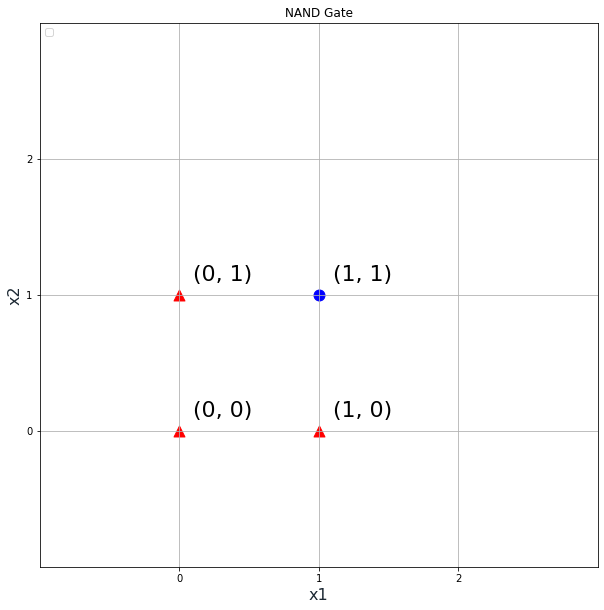

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.xlim(-1,3)
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.ylim(-1,3)
plt.grid()
plt.scatter(X[data["y"]==1]["x1"], X[data["y"]==1]["x2"], s=120, c="r", marker="^")
plt.scatter(X[data["y"]==0]["x1"], X[data["y"]==0]["x2"], s=120, c="b", marker="o")

#plt.plot(data[data["y"]==1]["x1"],data[data["y"]==1]["x2"],'o',c="b")
#plt.plot(data[data["y"]==0]["x1"],data[data["y"]==0]["x2"],'^',c="r")
plt.title('NAND Gate')
plt.xlabel('x1', color='#1C2833',fontsize=16)
plt.ylabel('x2', color='#1C2833',fontsize=16)
plt.legend(loc='upper left')
for i_x, i_y in zip(data["x1"], data["x2"]):
    plt.text(i_x+0.1, i_y+0.1, '({}, {})'.format(i_x, i_y),fontsize=22)
plt.show()


In [0]:
# plt.subplot(321)
# plt.scatter(X[data["y"]==1]["x1"], X[data["y"]==1]["x2"], s=80, c="r", marker=">")
# for i in range(len(data)):
#   x1=data.iloc[i,0]
#   x2=data.iloc[i:1]
#   plt.text(x1,x2,f"{x1},{x2}")
#   print("check")